# Machine Learning with Scikit-Learn

In this project, we will try to figure out the whole process of a Machine Learning project and how to achieve it with Scikit-learn. This project is significantly inspired by the course [Machine Learning in Python with Scikit-learn](https://inria.github.io/scikit-learn-mooc/index.html) by Inria. Meanwhile, I will put my proper reflection into it in order to make the project more precisely and completely.

Generally, a Machine Learning project is composed of the following steps:
<ol>
    <li>Problem scoping / Business Modelling</li>
    <li>Data Collection</li>
    <li>Data Wrangling</li>
    <li>Data Preprocessing</li>
    <li>Model Development</li>
    <li>Model Testing</li>
    <li>Model Deployment</li>
    <li>Model Monitoring</li>
</ol>

In the following, we will give a detailed explanation of each referenced step.

### 1. Problem Scoping / Business Modelling

We start a Machine Learning project by problem scoping, the first step that refers to understanding a problem and finding out various factors which affect the problem, define the goal or aim of the project. 

The term "Business Modelling" is widely used in the industrial field. During this step, we interpret the business demand or requirement to a problem which could be solved by machine learning techniques and methods. 


### 2. Data Collection

Next, we will collect data that we need, from specific sources, possibly different sources. In this project, we will use the data from the 1994 US census which is available as a CSV(Comma-seperated Values) file. The goal is to predict whether a person earns over 50K a year from heterogeneous data such as age, employment, education, family information, etc. 

In [50]:
# Download the dataset
!wget -O adult_census.csv https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv

--2022-11-28 18:44:39--  https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5383740 (5.1M) [text/plain]
Saving to: 'adult_census.csv'

adult_census.csv    100%[===================>]   5.13M  9.74MB/s    in 0.5s    

2022-11-28 18:44:40 (9.74 MB/s) - 'adult_census.csv' saved [5383740/5383740]



Now, we take the first look of the data using `pandas`. 

In [51]:
import pandas as pd
dataset = pd.read_csv("adult_census.csv")

# get first five rows of data(.tail() to get the last five rows)
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 3. Data Wrangling

Then we look at the variables in the dataset, concentrating on particularly several aspects. 

-  **Differentiate between numerical and categorical variables**, which need different preprocessing in most machine learning workflows.
-  **Unify different metrics** if neccessary.
-  Pay attention to **missing values**.
-  Visualize the **distribution of variables** to obtain some insights into the data, for instance, some more important variables that could help predict the unseen data, i.e, test data. 

The column named `class` is our target variable, which contains two classes : 
- <= 50k : low income
- \> 50k : high income

Therefore, the prediction problem is a **binary classification**.

The Python package `pandas` offers a amount of useful functions to inspect the data. Here are some examples : 

In [52]:
# get the total number of rows (samples)
dataset.shape[0]

48842

In [53]:
# get the total number of columns (variables)
dataset.shape[1]

14

We can compute the number of features by counting the number of columns and subtract 1, since one of the columns is the target.

In [54]:
dataset.shape[1] - 1

13

In [55]:
# get the number of samples for different classes in a variable
dataset["class"].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

We can observe that there are more samples with `<=50k` than  with `>50k` which means classes are slighly imbalanced.

Next, we visualize the distribution of individual features, note that `.hist()` only works for numerical features.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

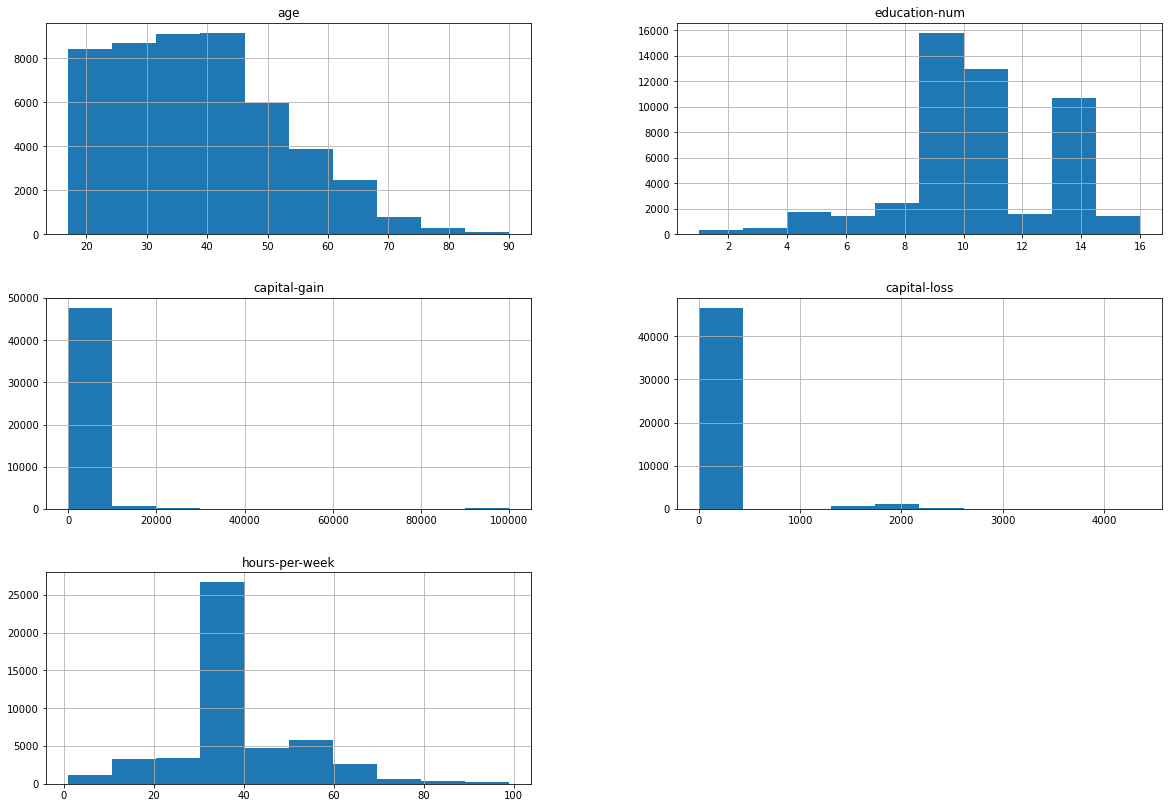

In [56]:
dataset.hist(figsize=(20, 14))

Few comments on these variables :
- `age` : less samples with age > 70
- `education-num` : peaks at 10 and 13
- `hours-per-week` : peaks at 40
- `capital-gain` / `capital-loss` : most of values are close to 0

Since the target variable is a categorical variable, it's recommended to transform it to numerical values. Knowing that there are two classes, we can simply remplace the categorical representation to binary values, 0(low income) and 1(high income).

In [57]:
dataset["class"]= dataset["class"].str.strip()
dataset["target"] = 0
dataset.loc[dataset["class"] == ">50K", "target"] = 1
del dataset["class"]
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


We seperate the data and the target.

In [58]:
target_name = "target"
target = dataset[target_name]
target

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: target, Length: 48842, dtype: int64

In [59]:
data = dataset.drop(columns=[target_name,])
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


### 4. Data Preprocessing

In this step, we aim to treat variables differently depending on their nature : numerical or categorical. To do so, we need to take several transformation into consideration.

- Detection of **redudant or highly correlated variables** and keep just one of them
    - Numerical variables : spearman correlation
    - Categorical variables : 
- Deal with **missing values**
    - Replace them with a value (mean, median of the variable or nearest value)
    - Delete the concerned variable if it is not important for prediction : `df.dropna(axis = 0, inplace = True)` (axis = 1 to drop the column)
- Encoding of **categorical data**
    - Ordinal encoding / Label encoding (`OrdinalEncoder`): uses a lexicographical strategy to map string category labels to integers, but it accepts a category constructor argument to pass categories in the expected ordering explicitly.
    - One-Hot encoding :  create a new set of dummy(binary) variables that is equal to the number of categories in the variable (called `k`).  For a given sample, the value of the column corresponding to the category will be set to 1 while all the columns of the other categories will be set to 0.
    - Dummy encoding : similar to one-hot encoding because it also uses dummy variables, but it will create k-1 dummy variables. In other words, dummy encoding removes a duplicate category present in the one-hot encoding.

<img src="images/One_Hot.png" alt="One-hot" width="500"/>
<img src="images/Dummy.png" alt="Dummy" width="500"/>

- Data normalization for **numerical data** (so-called **scaling features**) especially if the ML model is based on the distance
    - Linear models such as logistic regression generally benefit from scaling the features while other models such as decision trees do not need such preprocessing (but will not suffer from it). 
    - Working with non-scaled data will potentially force the algorithm to iterate more. Therefore, data scaling is beneficial in terms of computational performance.
- **Adjust the class distribution** if a huge imbalance between different classes is observed.
    - Over sampling : SMOTE, random oversampling, etc.
    - Under sampling : Cluster, random undersamling, etc.

#### Detect and drop the duplicated / highly correlated column

First of all, we separate categorical and numerical variables using their data types. We can get the data type of every vairable by using `dtypes`.

In [60]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

We could obviously see that numerical variables have `int64` data type while categorical variables are `object` type. The `object` data type means that it contains string values (or date, time values etc). Scikit-learn function `make_column_selector` selects features based on their data type.

In [61]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)

Then we can get the correlation of numerical variables using spearman method. 

In [62]:
corrmatsp = data.corr(method='spearman')
corrmatsp

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.063212,0.124436,0.057584,0.146604
education-num,0.063212,1.000000,0.118871,0.077017,0.164437
capital-gain,0.124436,0.118871,1.000000,-0.066328,0.091914
capital-loss,0.057584,0.077017,-0.066328,1.000000,0.060063
hours-per-week,0.146604,0.164437,0.091914,0.060063,1.000000


It seems that there does not exist highly correlated numerical variables. We use heatmap to visualize the correlation in order to confirm this observation.

Text(0.5, 1.05, 'Correlation of numerical variables')

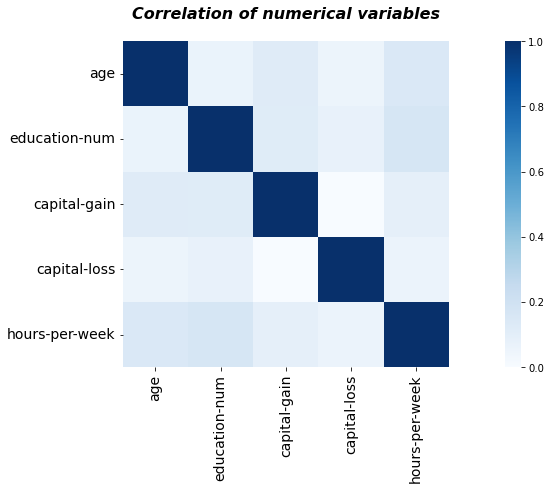

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20,6)) 
ax0 = fig.add_subplot(1, 1, 1) 
sns.heatmap(corrmatsp,square=True,ax=ax0,cmap="Blues",vmin=0.0, vmax=1.0) # cmap = "BuPu" (blue and purple)
ax0.set_xticklabels(numerical_columns, fontsize = 14)
ax0.set_yticklabels(numerical_columns, fontsize = 14)
ax0.set_title("Correlation of numerical variables",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)

Indeed, numerical variables are not highly correlated to each other. Therefore, we will keep all of them.

For categorical variables, we will also observe their correlation using `Cramer's V` method.

In [64]:
import numpy as np
import scipy.stats as stats

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) 
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1) 
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [65]:
rows= []
df_cat=pd.DataFrame(data[categorical_columns]) 

for var1 in df_cat:
    col = []
    for var2 in df_cat:
        cramers =cramers_V(df_cat[var1], df_cat[var2])
        col.append(round(cramers,2)) 
    rows.append(col)
    cramers_results = np.array(rows)

corrmatcat = pd.DataFrame(cramers_results, columns = df_cat.columns, index = df_cat.columns)
corrmatcat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
workclass,1.00,0.10,0.08,0.40,0.10,0.06,0.15,0.03
education,0.10,1.00,0.09,0.19,0.12,0.07,0.09,0.13
marital-status,0.08,0.09,1.00,0.13,0.49,0.08,0.46,0.06
occupation,0.40,0.19,0.13,1.00,0.18,0.08,0.42,0.06
relationship,0.10,0.12,0.49,0.18,1.00,0.10,0.65,0.07
race,0.06,0.07,0.08,0.08,0.10,1.00,0.11,0.40
sex,0.15,0.09,0.46,0.42,0.65,0.11,1.00,0.05
native-country,0.03,0.13,0.06,0.06,0.07,0.40,0.05,1.00


We use heatmap to visualize the correlation of categorical variables.

Text(0.5, 1.05, 'Correlation of categorical variables')

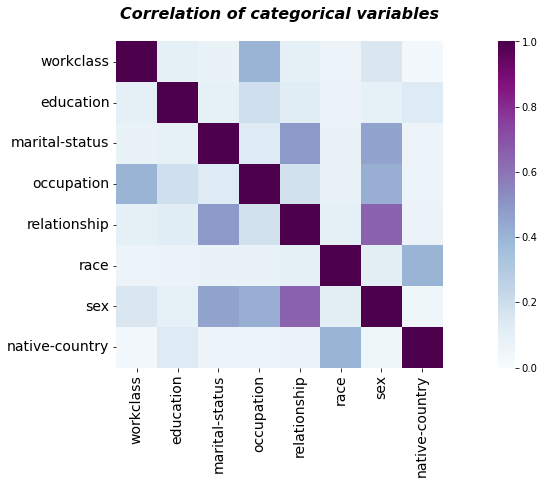

In [66]:
group_names = categorical_columns
fig = plt.figure(figsize=(20,6))
ax0 = fig.add_subplot(1, 1, 1)
sns.heatmap(corrmatcat,square=True,cmap="BuPu",ax=ax0,vmin=0.0, vmax=1.0)
ax0.set_xticklabels(group_names, fontsize = 14)
ax0.set_yticklabels(group_names, fontsize = 14)
ax0.set_title("Correlation of categorical variables",fontsize=16,fontweight='bold',fontstyle='italic',color='black',y=1.05)

We can observe that `relationship` and `sex` are correlated, with the value equals to 0.65. In our case, we will keep both of them.

However, we saw that two variables `education` and  `education-num` provide the same information.

In [67]:
pd.crosstab(index = data["education"], columns = data["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


We can see that for every entry of `education-num` there is only one single corresponding value, which shows that these two variables give the same information. Considering that having redudant or highlt correlated variables can be problem in machine learning algorithms, therefore we can remove one of these two variables in practice without losing information.

In [68]:
data = data.drop(columns="education-num")

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [69]:
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)
numerical_columns

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

#### Scale numerical features

We use a scikit-learn transformer called `StandardScaler` shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

The method `fit_transform` of `StandardScaler` is a shorthand method to call successively fit and then transform. The `fit` method is applied to scale each feature individually (i.e. each column in the data matrix). For each feature, we subtract its mean and divide by its standard deviation (specific to the StandardScaler). The `transform` method uses a predefined function, called a transformation function, it uses the model states and the input data to output a transformed version of the input data.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data[numerical_columns])
data_train_scaled.shape

(48842, 4)

#### Detect and deal with the missing values

Let's check if we have missing values at all.

In [71]:
print(data.isnull().values.any())

False


In our case, all values are well filled. If we have missing values, we can check total number of missing values and if a column has missing values.

In [72]:
# check total number of missing values
print(data.isnull().sum().sum())

0


In [73]:
# check if a column has missing values 
print(data['age'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: age, Length: 48842, dtype: bool


`Pandas` recognized the 'NA' as a missing value. Unfortunately, the other types weren't recognized. An easy way to detect these various formats is to put them in a list. Then when we import the data, Pandas will recognize them right away.

In [74]:
# making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("adult_census.csv", na_values = missing_values)
print(data['age'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: age, Length: 48842, dtype: bool


A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values. 

First of all, it's possible to fill in missing values with a single value.

In [75]:
# Replace missing values with a number
df['age'].fillna(25, inplace=True)

In [76]:
# Location based replacement
df.loc[2,'age'] = 25

In [77]:
# Replace using median 
median = df['age'].median()
df['age'].fillna(median, inplace=True)

Furthermore, there are a range of methods for imputation :
- **Deductive Imputation** : uses logical relations to fill in missing values, but can be time consuming or requires specific coding. 
- **Mean/Median/Mode Imputation** : for any "NA" value in a given column, mean imputation replaces "NA" with the mean of that column. (Same for median and mode imputation.)
- **Proper Multiply Stochastic Regression Imputation** : for any "NA" value in a given column, proper regression imputation replaces "NA" with a predicted value based on a regression line and random error.

In Scikit-learn, several functions are used to imputation :
- Univariate feature imputation (`impute.SimpleImputer`) : imputes values in the i-th feature dimension using only non-missing values in that feature dimension 
    - Missing numerical data can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. `SimpleImputer(missing_values=np.nan, strategy='mean')`
    - Missing categorical data can be processed by 'most_frequent' or 'constant' strategy: `SimpleImputer(strategy="most_frequent")`
- Multivariate feature imputation (`impute.IterativeImputer`) : use the entire set of available feature dimensions to estimate the missing values.
- Nearest neighbors imputation (`impute.KNNImputer`) : use the k-Nearest Neighbors approach to fill missing values.

[More details](https://scikit-learn.org/stable/modules/impute.html) are well explained in the documentation.


In [78]:
# An example
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler(),
# )])

#### Encoding of categorical variables

In general, **OneHotEncoder** is the encoding strategy used when the downstream models are linear models while **OrdinalEncoder** is often a good strategy with tree-based models.

Using an OrdinalEncoder will output ordinal categories. This means that there is an order in the resulting categories (e.g. 0 < 1 < 2). The impact of violating this ordering assumption is really dependent on the downstream models. Linear models will be impacted by misordered categories while tree-based models will not. An OrdinalEncoder with linear models can be used but we need to be sure that:
1. the original categories (before encoding) have an ordering
2. the encoded categories follow the same ordering than the original categories

One-hot encoding for categorical variables with high cardinality can cause computational inefficiency in tree-based models. Because of this, it is not recommended to use OneHotEncoder in such cases even if the original categories do not have a given order.

Both Ont-hot encoding and dummy encoding can be implemented in `Pandas` (using [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)) or `Scikit-learn` (using [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

- `get_dummies` in `pandas`
    - One-hot encoding : `pd.get_dummies(data, drop_first = False)`
    - Dummy encoding : `pd.get_dummies(data, drop_first = True)`
- `OneHotEncoder` in `OneHotEncoder`
    - One-hot encoding : `OneHotEncoder()`
    - Dummy encoding : `OneHotEncoder(drop = "first")` (set 'drop' to 'first' that drops the first category of each variable)


In [79]:
from sklearn.preprocessing import OneHotEncoder

data_categorical = data[categorical_columns]
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data_categorical)
data_encoded.shape

(48842, 102)

In [80]:
# feature_names = encoder.get_feature_names_out(data_categorical.columns)
# pd.DataFrame(data_encoded, columns=feature_names).head()

If there is only a few number samples in a class of a variable, it will be a problem during cross-validation: if the sample ends up in the test set during splitting then the classifier would not have seen the category during training and will not be able to encode it. We can use the parameter `handle_unknown`, i.e. if an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros.

Be aware the **OrdinalEncoder** exposes as well a parameter `handle_unknown`. It can be set to `use_encoded_value`. If that option is chosen, you can define a fixed value to which all unknowns will be set to during transform. For example, `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=42)` will set all values encountered during `transform` to `42` which are not part of the data encountered during the `fit` call. 



### 5. Model Development

#### Split data into train and test sets

The dataset will be split it into a training and testing sets. The reason is when building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized).

In [81]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42, test_size=0.25, shuffle=True)

#### Create ML Pipeline

We can easily combine sequential operations with a scikit-learn Pipeline, which chains together operations and is used as any other classifier or regressor. The helper function `make_pipeline` will create a Pipeline: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

Scikit-learn provides a `ColumnTransformer` class which will send specific columns to a specific transformer, making it easy to fit a single predictive model on a dataset that combines both kinds of variables together (heterogeneously typed tabular data).

`ColumnTransformer` is like any other scikit-learn transformer, in particular it can be combined with a classifier in a Pipeline.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('standard_scaler', StandardScaler(), numerical_columns)])

classifier_lr = LogisticRegression(max_iter=500)

model = make_pipeline(preprocessor, classifier_lr)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

#### Traning ML Model
- `.fit(X, y)` : train a model 
- `.predict(X)` : make predictions
- `.score(X, y)` : evaluate a model using accuracy

In [83]:
model.fit(data_train, target_train)
predicted_target = model.predict(data_test)
model.score(data_test, target_test)

0.8575874211776268


#### Model evaluation using cross-validation
A single split of train test set does not provide the variability of performance, while cross-validation consists of repeating the procedure such that the training and testing sets are different each time. Cross validation generalization performance metrics are collected for each repetition and then aggregated. There are everal strategies : 
- `KFold` :  the entire dataset is split into K partitions. The fit/score procedure is repeated K times where at each iteration K - 1 partitions are used to fit the model and 1 partition is used to score. 
- `ShuffleSplit` : split the shuffled dataset into a train and a test set.

To make it easy, all error metrics in scikit-learn, like `mean_absolute_error`, can be transformed into a score to be used in `cross_validate`. To do so, you need to pass a string of the error metric with an additional `neg_` string at the front to the parameter scoring.

In [84]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# `cross_validate` function are able to compute the error on the training set.
cv = ShuffleSplit(n_splits=30, test_size=0.25, random_state=0)
cv_result = cross_validate(model, data, target, cv=cv, scoring="neg_mean_absolute_error", return_train_score=True) # scoring="neg_mean_absolute_error" : the negative of the mean absolute error 
cv_result

{'fit_time': array([1.02583504, 0.98323202, 0.96344781, 1.08456016, 0.97725201,
        0.93274093, 0.99372816, 0.94518995, 0.92311382, 0.91180491,
        0.97177386, 0.93313718, 0.98007822, 1.020643  , 0.89668489,
        0.95530891, 0.9669559 , 0.91866684, 0.96377897, 0.96107483,
        0.99091911, 0.93958211, 0.94690728, 1.03831911, 0.96575093,
        1.04432201, 0.91525507, 0.98398685, 0.95638299, 0.90051198]),
 'score_time': array([0.01838803, 0.02231097, 0.01967216, 0.0227809 , 0.02083087,
        0.01890993, 0.01987505, 0.01826   , 0.02010822, 0.02114701,
        0.01836896, 0.01805997, 0.02081585, 0.0201149 , 0.01823592,
        0.01811218, 0.01826692, 0.01808906, 0.01931   , 0.01833606,
        0.01872182, 0.01956081, 0.01993585, 0.01795673, 0.01900005,
        0.01827407, 0.01794791, 0.01789427, 0.01806402, 0.0196991 ]),
 'test_score': array([-0.14806322, -0.15158464, -0.14929162, -0.14675293, -0.14871837,
        -0.14748997, -0.14511506, -0.14593399, -0.1421669 , -0.1476

#### Identify whether a model is generalizing, overfitting, or underfitting

**Overfitting** is caused by the limited size of the training set, the noise in the data, and the high flexibility of common machine learning models. => The model is too complicated.

**Underfitting** happens when the learnt prediction functions suffer from systematic errors. This can be caused by a choice of model family and parameters, which leads to a lack of flexibility to capture the repeatable structure of the true data generating process. => The model is so simple.

**Bias** and **variance** can give us a statistical view of overfitting and underfitting. High bias means underfitting, high variance can cause overfitting. 

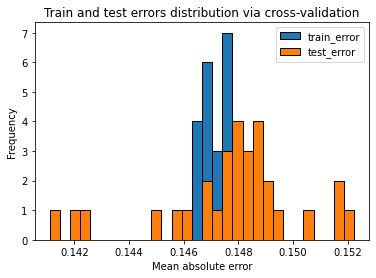

In [85]:
import matplotlib.pyplot as plt

cv_results = pd.DataFrame(cv_result)
# The cross-validation used the negative mean absolute error. We transform the negative mean absolute error into a positive mean absolute error.
scores = pd.DataFrame()
scores[["train_error", "test_error"]] = -cv_results[["train_score", "test_score"]]

scores.plot.hist(bins=30, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Train and test errors distribution via cross-validation")

We can observe that train error is smaller than test error, but not too much difference between them, which is reasaonable because training data is more capable to capture the data using target labels while test data is the data that the model has never seen before without labels. 

We can plot a validation curve by sklearn to acquire knowledge above experiment and varies the value of a hyperparameter. See more details in this [tutorial](https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_validation_curve.html).

The final result will be presented by the mean accuracy and the variation of the accuracy across folds (presented by standard-deviation). 

Note that by computing the standard-deviation of the cross-validation scores, we can estimate the uncertainty of our model generalization performance. This is the main advantage of cross-validation and can be crucial in practice.


In [86]:
print(
    "The mean cross-validation test score is: " + 
    f"{cv_results.test_score.mean():.3f} ± {cv_results.test_score.std():.3f}"
)

The mean cross-validation test score is: -0.148 ± 0.003


In [87]:
from sklearn.model_selection import cross_val_score
# test_score only
scores = cross_val_score(model, data, target)
scores

array([0.8512642 , 0.8498311 , 0.84756347, 0.85247748, 0.85524161])

#### Optimization of hyperparameters by Grid-search

The `GridSearchCV` estimator takes a `param_grid parameter` which defines all hyperparameters and their associated values. The grid-search will be in charge of creating all possible combinations and test them.

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",
     LogisticRegression(random_state=42))])

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(data_train, target_train)

/Users/wq/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/wq/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/wq/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wq/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs fa

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country']),
                   

In [90]:
accuracy = model_grid_search.score(data_test, target_test)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.86


In [91]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [92]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__penalty,param_classifier__solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
4,1.058071,0.019060,0.031990,0.001160,l1,saga,"{'classifier__penalty': 'l1', 'classifier__sol...",0.851551,0.849577,0.850564,0.000987,1
2,2.150993,0.034382,0.033164,0.002293,l1,liblinear,"{'classifier__penalty': 'l1', 'classifier__sol...",0.851387,0.849304,0.850345,0.001041,2
9,0.254569,0.000051,0.029905,0.001265,l2,saga,"{'classifier__penalty': 'l2', 'classifier__sol...",0.851114,0.849468,0.850291,0.000823,3
8,0.253774,0.000183,0.030301,0.001143,l2,sag,"{'classifier__penalty': 'l2', 'classifier__sol...",0.851168,0.849304,0.850236,0.000932,4
5,0.445766,0.008780,0.031031,0.000281,l2,newton-cg,"{'classifier__penalty': 'l2', 'classifier__sol...",0.851059,0.849249,0.850154,0.000905,5


In [93]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,penalty,solver,mean_test_score,std_test_score,rank_test_score
4,l1,saga,0.850564,0.000987,1
2,l1,liblinear,0.850345,0.001041,2
9,l2,saga,0.850291,0.000823,3
8,l2,sag,0.850236,0.000932,4
5,l2,newton-cg,0.850154,0.000905,5
7,l2,liblinear,0.850154,0.000905,5
6,l2,lbfgs,0.850127,0.000932,7
0,l1,newton-cg,NaN,NaN,8
1,l1,lbfgs,NaN,NaN,9
3,l1,sag,NaN,NaN,10


In [95]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["penalty"],
    columns=["solver"])
pivoted_cv_results

solver,lbfgs,liblinear,newton-cg,sag,saga
penalty,,,,,
l1,NaN,0.850345,NaN,NaN,0.850564
l2,0.850127,0.850154,0.850154,0.850236,0.850291


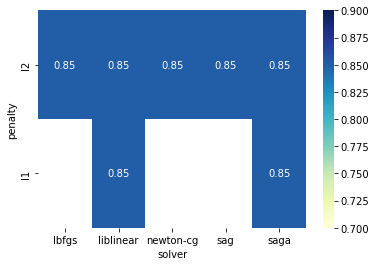

In [96]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7,
                 vmax=0.9)
ax.invert_yaxis()

### Different preprocessing for different models 

For tree-based models, the handling of numerical and categorical variables is simpler than for linear models:
- we do not need to scale the numerical features
- using an ordinal encoding for the categorical variables is fine even if the encoding results in an arbitrary ordering

#### Optimization of hyperparameters by randomized-search

In [97]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier  # gradient-boosting trees
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

classifier_boosting = HistGradientBoostingClassifier()

model = make_pipeline(preprocessor, classifier_boosting)

In [98]:
model.fit(data_train, target_train)
predicted_target = model.predict(data_test)
model.score(data_test, target_test)

0.8807632462533781

### 6. Model Testing
